**Indriana Noviyanti**
**1304201002**

In [15]:
pip install chardet

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import numpy as np



import re
import sklearn

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline




In [20]:
df_train = pd.read_csv('/content/Train_data.csv')
df_test = pd.read_csv('/content/test_data.csv')
df_test = df_test.drop('Unnamed: 0',axis=1)


# **EXPLORE DATASET**

In [22]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [23]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,25,4,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,0,icmp,25,2,312,1856,0,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,0,icmp,25,2,245,2058,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,0,icmp,25,2,298,1267,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,icmp,20,2,740,0,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal


**Save training dataset and test dateaset to each df and split X and Y (xAttack, analysis features).**

In [24]:
X_train = df_train.drop('xAttack', axis=1)
Y_train = df_train.loc[:,['xAttack']]
X_test = df_test.drop('xAttack', axis=1)
Y_test = df_test.loc[:,['xAttack']]

In [25]:
print(Y_train.apply(lambda col: col.unique()))

  xAttack
0  normal
1     dos
2     r2l
3   probe
4     u2r


Preprocessing and one hot encoding, X is onehotencoder, Y is LabelBinarizer

In [26]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [27]:
le = preprocessing.LabelEncoder()
enc = OneHotEncoder()
lb = preprocessing.LabelBinarizer()

X **OneHotEncoding**

In [28]:
X_train['protocol_type'] = le.fit_transform(X_train['protocol_type'])
# enc.fit_transform(X_train['protocol_type'])

X_test['protocol_type'] = le.fit_transform(X_test['protocol_type'])
# enc.fit_transform(X_test['protocol_type'])

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Y **LabelBinarizer**

In [29]:
Y_train['xAttack'] = le.fit_transform(Y_train['xAttack'])
lb.fit_transform(Y_train['xAttack'])

Y_test['xAttack'] = le.fit_transform(Y_test['xAttack'])
lb.fit_transform(Y_test['xAttack'])

Y_train.describe()

,xAttack
count,125973.000000
mean,0.744985
std,0.653748
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,4.000000


1. Standard deviation
We have applied a method to exclude features with small standard deviation (small deviation). However, when the feature type is discrete, the deviation is small.

In [30]:
#except continuous feature
con_list = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'su_attempted', 'is_host_login', 'is_guest_login']
con_train = X_train.drop(con_list, axis=1)

#drop n smallest std features
stdtrain = con_train.std(axis=0)
std_X_train = stdtrain.to_frame()
std_X_train.nsmallest(10, columns=0).head(10)

,0
num_outbound_cmds,0.000000
urgent,0.014366
num_shells,0.022181
root_shell,0.036603
num_failed_logins,0.045239
num_access_files,0.099370
dst_host_srv_diff_host_rate,0.112564
diff_srv_rate,0.180314
dst_host_diff_srv_rate,0.188922
wrong_fragment,0.253530


In [31]:
X_train = X_train.drop(['num_outbound_cmds'], axis=1)
X_test = X_test.drop(['num_outbound_cmds'], axis=1)

df_train = pd.concat([X_train, Y_train], axis=1)
df_train.head()

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Std picks the 10 low and stores the features in drop -> X_train_stdrop. (Will be used after ensemble feature selection)

In [32]:
stdrop_list = ['urgent', 'num_shells', 'root_shell',
        'num_failed_logins', 'num_access_files', 'dst_host_srv_diff_host_rate',
        'diff_srv_rate', 'dst_host_diff_srv_rate', 'wrong_fragment']

X_test_stdrop = X_test.drop(stdrop_list, axis=1)

X_train_stdrop = X_train.drop(stdrop_list, axis=1)

df_train_stdrop = pd.concat([X_train_stdrop, Y_train], axis=1)

df_train_stdrop.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,0,20,2,491,0,0,0,0,0,...,0.00,150,25,0.17,0.17,0.00,0.00,0.05,0.00,1
1,0,2,45,2,146,0,0,0,0,0,...,0.00,255,1,0.00,0.88,0.00,0.00,0.00,0.00,1
2,0,0,50,4,0,0,0,0,0,0,...,0.00,255,26,0.10,0.00,1.00,1.00,0.00,0.00,0
3,0,0,25,2,232,8153,0,0,1,0,...,0.00,30,255,1.00,0.03,0.03,0.01,0.00,0.01,1
4,0,0,25,2,199,420,0,0,1,0,...,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,1


Baseline - Learn about performance with linear regression

Linear regression

In [33]:
from sklearn import linear_model

In [34]:
LR = linear_model.LinearRegression()

In [35]:
LR.fit(X_train, Y_train)

LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
lr_score = LR.score(X_test, Y_test)
print('Linear regression processing ,,,')
print('Linear regression Score: %.2f %%' % lr_score)

Linear regression processing ,,,
Linear regression Score: 0.33 %


The linear regression yields only 33% probability.

2. Ensemble feature selection
Ensemble Modeling can see how the feature affected each model. Therefore, we tried feature selection around those features (attempt to remove Irrelevant feature).

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

In [38]:
AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, learning_rate=1.0)
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='auto', bootstrap=True)
ET = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='auto', bootstrap=False)
GB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, max_features='auto')

In [39]:
y_train = Y_train['xAttack'].ravel()
x_train = X_train.values
x_test = X_test.values

Check the feature importances to see how accurate the basic features are.

In [40]:
AB.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [41]:
AB_feature = AB.feature_importances_
AB_feature

ab_score = AB.score(X_test, Y_test)

print('AdaBoostClassifier processing ,,,')
print('AdaBoostClassifier Score: %.3f %%' % ab_score)

AdaBoostClassifier processing ,,,
AdaBoostClassifier Score: 0.753 %


In [42]:
RF.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=10)

In [43]:
RF_feature = RF.feature_importances_
RF_feature

rf_score = RF.score(X_test, Y_test)

print('RandomForestClassifier processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf_score)

RandomForestClassifier processing ,,,
RandomForestClassifier Score: 0.750 %


In [44]:
ET.fit(X_train, Y_train)

ExtraTreesClassifier(max_features='auto', n_estimators=10)

In [45]:
ET_feature = ET.feature_importances_
ET_feature

et_score = ET.score(X_test, Y_test)

print('ExtraTreesClassifier processing ,,,')
print('ExtraTreeClassifier: %.3f %%' % et_score)

ExtraTreesClassifier processing ,,,
ExtraTreeClassifier: 0.771 %


In [46]:
GB.fit(X_train, Y_train)

GradientBoostingClassifier(loss='deviance', max_features='auto',
                           n_estimators=200)

In [47]:
GB_feature = GB.feature_importances_
GB_feature

gb_score = GB.score(X_test, Y_test)

print('GradientBoostingClassifier processing ,,,')
print('GradientBoostingClassifier Score: %.3f %%' % gb_score)

GradientBoostingClassifier processing ,,,
GradientBoostingClassifier Score: 0.767 %


Let's look at how the features affect each other through Ensemble

In [48]:
cols = X_train.columns.values

feature_df = pd.DataFrame({'features': cols,
                           'AdaBoost' : AB_feature,
                           'RandomForest' : RF_feature,
                           'ExtraTree' : ET_feature,
                           'GradientBoost' : GB_feature
                          })
feature_df.head(8)

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
0,duration,0.000062,0.003127,0.001795,0.001521
1,protocol_type,0.460427,0.019034,0.033909,0.011418
2,service,0.520245,0.034985,0.025852,0.007747
3,flag,0.000044,0.006674,0.011421,0.001152
4,src_bytes,0.006696,0.134085,0.020415,0.361490
5,dst_bytes,0.001451,0.108305,0.004906,0.062402
6,land,0.000005,0.000012,0.000083,0.000036
7,wrong_fragment,0.000105,0.005011,0.014283,0.013346


Graphs showing the influence of features

[Text(0, 0, 'duration'),
 Text(1, 0, 'protocol_type'),
 Text(2, 0, 'service'),
 Text(3, 0, 'flag'),
 Text(4, 0, 'src_bytes'),
 Text(5, 0, 'dst_bytes'),
 Text(6, 0, 'land'),
 Text(7, 0, 'wrong_fragment'),
 Text(8, 0, 'urgent'),
 Text(9, 0, 'hot'),
 Text(10, 0, 'num_failed_logins'),
 Text(11, 0, 'logged_in'),
 Text(12, 0, 'num_compromised'),
 Text(13, 0, 'root_shell'),
 Text(14, 0, 'su_attempted'),
 Text(15, 0, 'num_root'),
 Text(16, 0, 'num_file_creations'),
 Text(17, 0, 'num_shells'),
 Text(18, 0, 'num_access_files'),
 Text(19, 0, 'is_host_login'),
 Text(20, 0, 'is_guest_login'),
 Text(21, 0, 'count'),
 Text(22, 0, 'srv_count'),
 Text(23, 0, 'serror_rate'),
 Text(24, 0, 'srv_serror_rate'),
 Text(25, 0, 'rerror_rate'),
 Text(26, 0, 'srv_rerror_rate'),
 Text(27, 0, 'same_srv_rate'),
 Text(28, 0, 'diff_srv_rate'),
 Text(29, 0, 'srv_diff_host_rate'),
 Text(30, 0, 'dst_host_count'),
 Text(31, 0, 'dst_host_srv_count'),
 Text(32, 0, 'dst_host_same_srv_rate'),
 Text(33, 0, 'dst_host_diff_srv_r

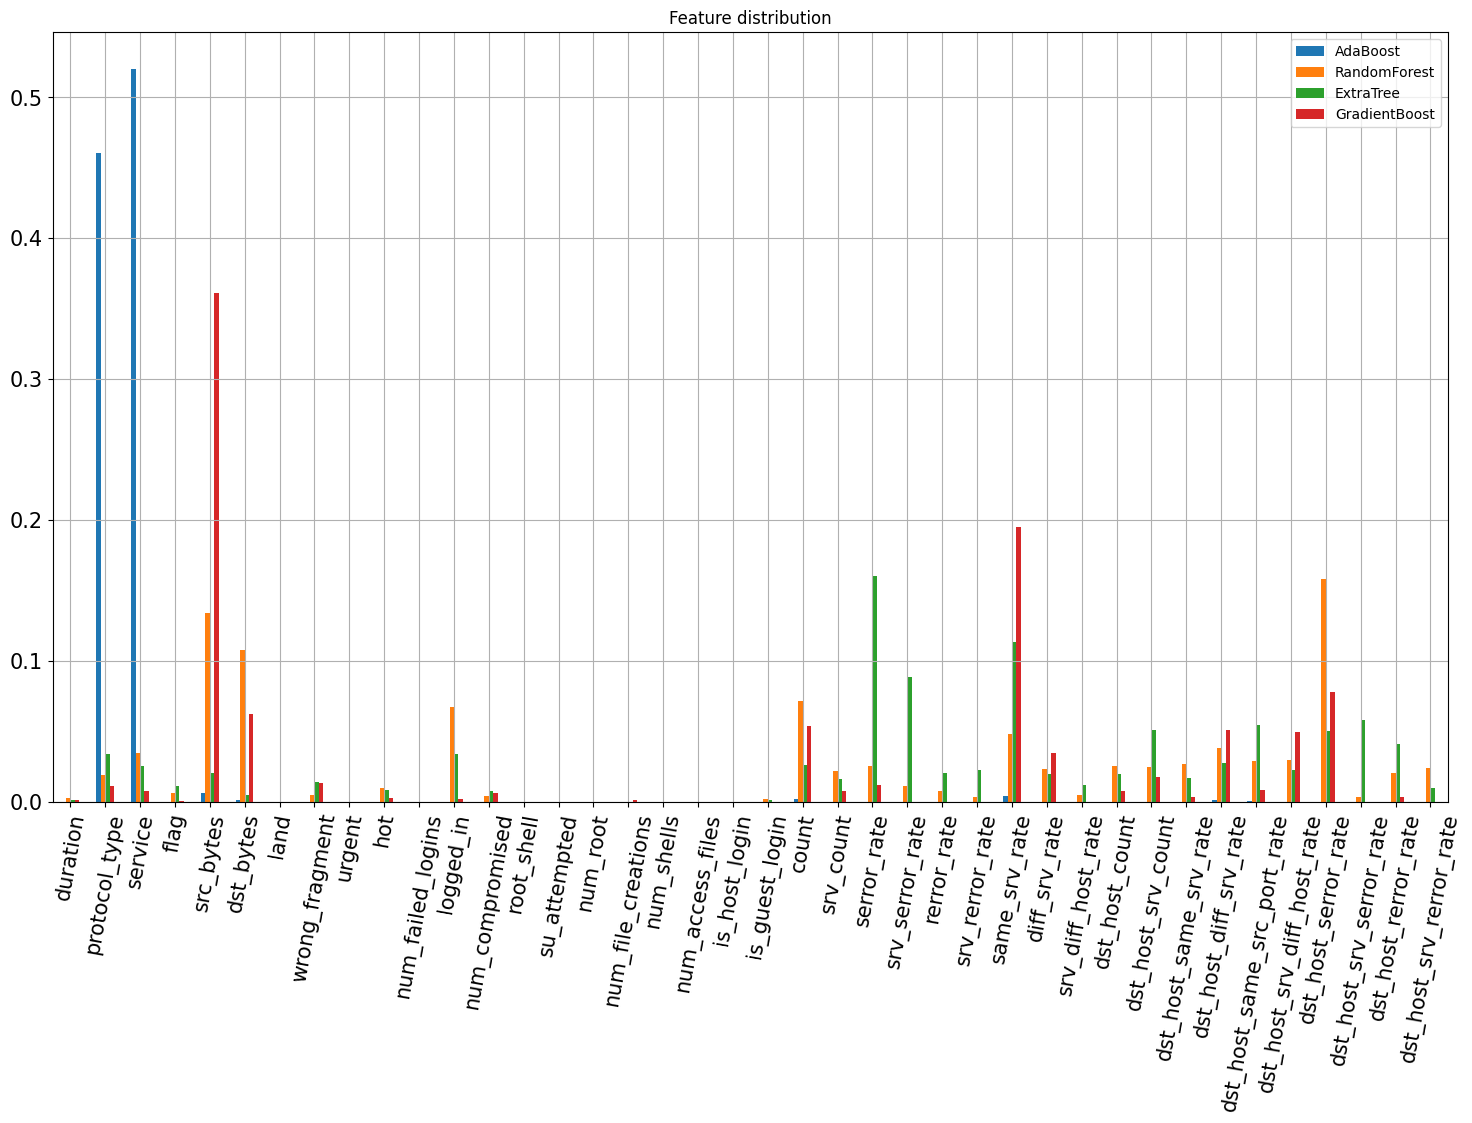

In [49]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

graph = feature_df.plot.bar(figsize = (18, 10), title = 'Feature distribution', grid=True, legend=True, fontsize = 15,
                            xticks=feature_df.index)
graph.set_xticklabels(feature_df.features, rotation = 80)

Extract twelve features from each Ensemble model¶

In [50]:
a_f = feature_df.nlargest(12, 'AdaBoost')
e_f = feature_df.nlargest(12, 'ExtraTree')
g_f = feature_df.nlargest(12, 'GradientBoost')
r_f = feature_df.nlargest(12, 'RandomForest')

Delete Duplicates

In [51]:
result = pd.concat([a_f, e_f, g_f, r_f])
result = result.drop_duplicates() # delete duplicate feature
result

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
2,service,5.202447e-01,0.034985,0.025852,0.007747
1,protocol_type,4.604267e-01,0.019034,0.033909,0.011418
4,src_bytes,6.695518e-03,0.134085,0.020415,0.361490
27,same_srv_rate,4.407079e-03,0.048451,0.113518,0.194910
21,count,2.364710e-03,0.071472,0.026332,0.054406
33,dst_host_diff_srv_rate,1.810780e-03,0.038439,0.027576,0.051017
5,dst_bytes,1.451047e-03,0.108305,0.004906,0.062402
34,dst_host_same_src_port_rate,7.961217e-04,0.029542,0.055059,0.008546
36,dst_host_serror_rate,3.450299e-04,0.158614,0.050220,0.078085
31,dst_host_srv_count,3.130603e-04,0.024834,0.050919,0.017962


In [52]:
selected_features = result['features'].values.tolist()
selected_features

['service',
 'protocol_type',
 'src_bytes',
 'same_srv_rate',
 'count',
 'dst_host_diff_srv_rate',
 'dst_bytes',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'num_compromised',
 'serror_rate',
 'srv_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'logged_in',
 'dst_host_srv_diff_host_rate',
 'diff_srv_rate',
 'wrong_fragment']

Below are the results of training with the exception of the features with small standard deviations.

In [53]:
AB.fit(X_train_stdrop, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [54]:
ab2_score = AB.score(X_test_stdrop, Y_test)

print('AdaBoostClassifier_stdrop processing ,,,')
print('AdaBoostClasifier Score: %.3f %%' % ab2_score)

AdaBoostClassifier_stdrop processing ,,,
AdaBoostClasifier Score: 0.736 %


In [55]:
RF.fit(X_train_stdrop, Y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=10)

In [56]:
rf2_score = RF.score(X_test_stdrop, Y_test)

print('RandomForestClassifier_stdrop processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf2_score)

RandomForestClassifier_stdrop processing ,,,
RandomForestClassifier Score: 0.749 %


In [57]:
ET.fit(X_train_stdrop, Y_train)

ExtraTreesClassifier(max_features='auto', n_estimators=10)

In [58]:
et2_score = ET.score(X_test_stdrop, Y_test)

print('ExtraTreesClassifier_stdrop processing ,,,')
print('ExtraTreesClassifier Score: %.3f %%' % et2_score)

ExtraTreesClassifier_stdrop processing ,,,
ExtraTreesClassifier Score: 0.759 %


In [59]:
GB.fit(X_train_stdrop, Y_train)

GradientBoostingClassifier(loss='deviance', max_features='auto',
                           n_estimators=200)

In [60]:
gb2_score = GB.score(X_test_stdrop, Y_test)

print('GradientBoostingClassifier_stdrop processing ,,,')
print('GradientBoostingClassifier Score: %.2f %%' % gb2_score)

GradientBoostingClassifier_stdrop processing ,,,
GradientBoostingClassifier Score: 0.75 %


Only features obtained through ensemble

In [61]:
X_train_ens = X_train[selected_features]
X_train_ens.head()

X_test_ens = X_test[selected_features]
X_test_ens.head()

,service,protocol_type,src_bytes,same_srv_rate,count,dst_host_diff_srv_rate,dst_bytes,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_same_srv_rate,num_compromised,serror_rate,srv_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,logged_in,dst_host_srv_diff_host_rate,diff_srv_rate,wrong_fragment
0,25,0,0,1.0,110,0.00,0,0.00,0.65,255,1.00,0,1.0,1.0,0.65,0.32,0,0.00,0.0,0
1,25,0,312,1.0,1,0.00,1856,1.00,0.00,254,1.00,0,0.0,0.0,0.00,0.00,1,0.06,0.0,0
2,25,0,245,1.0,5,0.00,2058,0.01,0.01,255,1.00,0,0.0,0.0,0.00,0.00,1,0.05,0.0,0
3,25,0,298,1.0,4,0.00,1267,0.00,0.00,255,1.00,0,0.0,0.0,0.00,0.00,1,0.00,0.0,0
4,20,0,740,1.0,1,0.03,0,0.18,0.00,19,0.18,0,0.0,0.0,0.00,0.00,0,0.00,0.0,0


3. Correlation
Features that have high correlation among multiple features (redundant features) are merged or deleted. This is because if there is a large correlation between these features, there is no need to increase the number of features.

<Axes: >

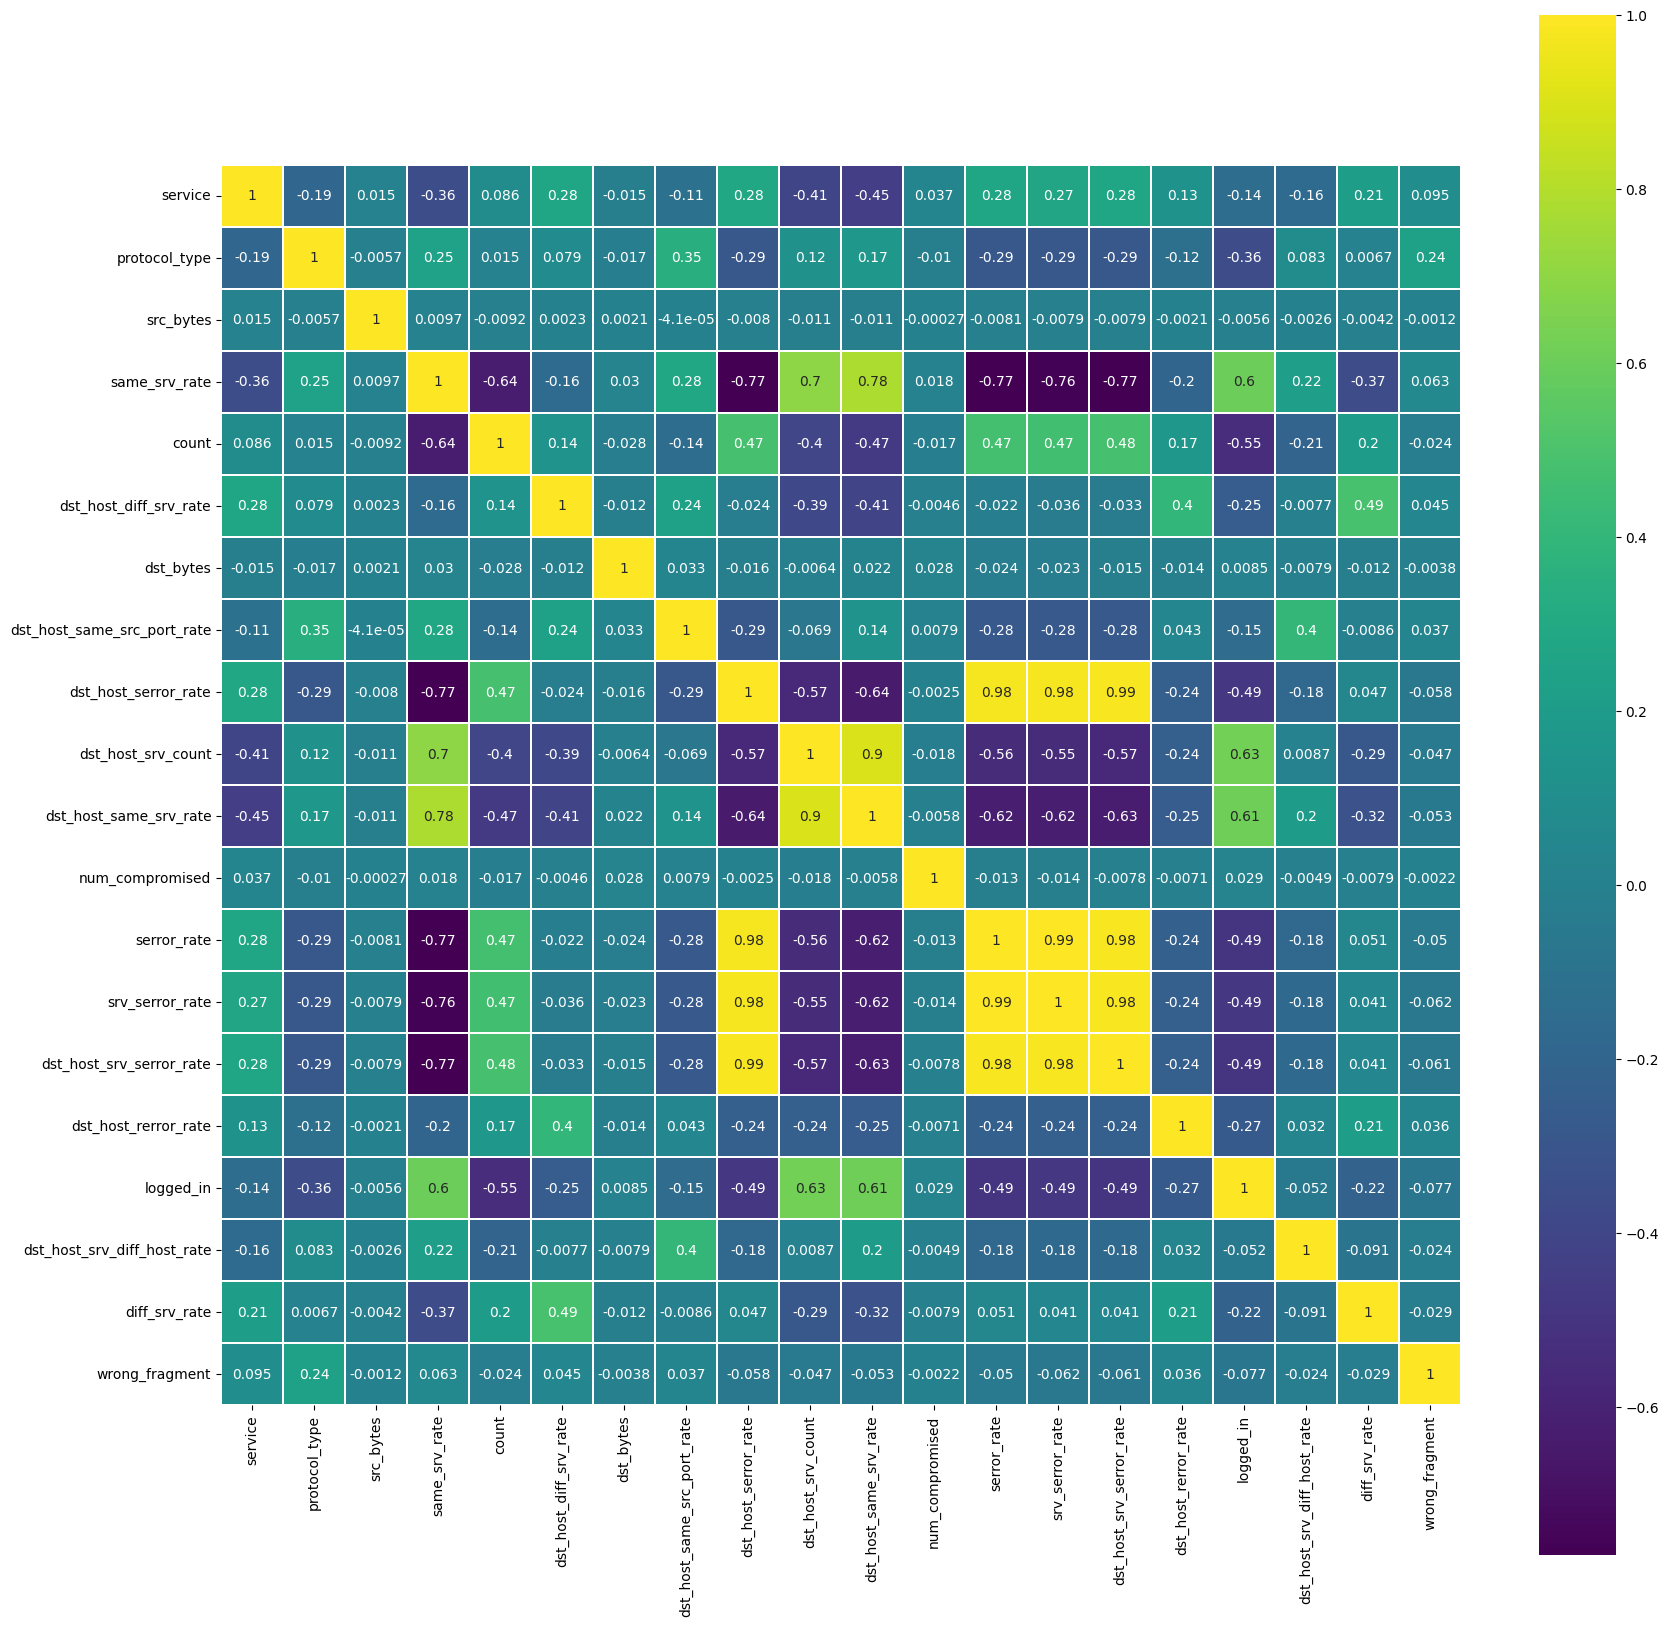

In [62]:
sample = X_train_ens[:10000]

colormap = plt.cm.viridis
plt.figure(figsize=(20, 20))
sns.heatmap(sample.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

The above graph analysis shows that the dependency is high in the following features

In [71]:
selected2 = ['dst_host_serror_rate', 'serror_rate']
X_train_cordrop = X_train_ens.drop(selected2, axis=1)
X_train_cordrop.describe()

X_test_cordrop = X_test_ens.drop(selected2, axis=1)
X_test_cordrop.describe()

,service,protocol_type,src_bytes,same_srv_rate,count,dst_host_diff_srv_rate,dst_bytes,dst_host_same_src_port_rate,dst_host_srv_count,dst_host_same_srv_rate,num_compromised,srv_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,logged_in,dst_host_srv_diff_host_rate,diff_srv_rate,wrong_fragment
count,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,35.451700,0.278600,6.845032e+03,0.739925,80.152400,0.089412,1.996999e+03,0.133167,139.645700,0.605769,0.020500,0.101696,0.097781,0.236296,0.436600,0.020102,0.089752,0.009000
std,15.824769,0.657134,8.675409e+04,0.413711,129.028094,0.218190,2.006975e+04,0.307154,111.548555,0.436278,0.289289,0.295464,0.279651,0.389137,0.495989,0.089353,0.252240,0.146701
min,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000e+00,0.200000,1.000000,0.000000,0.000000e+00,0.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,5.400000e+01,1.000000,8.000000,0.020000,4.400000e+01,0.000000,159.500000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.000000,0.000000,2.850000e+02,1.000000,126.000000,0.060000,5.990000e+02,0.030000,255.000000,1.000000,0.000000,0.000000,0.000000,0.390000,1.000000,0.010000,0.060000,0.000000
max,70.000000,2.000000,6.291668e+06,1.000000,511.000000,1.000000,1.285078e+06,1.000000,255.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


2) Modeling
Modeling after completion of the feature selection process (elimination of low deviation, high correlation)¶
Comparing final modeling results with features that affect ensemble modeling
Ensemble Modeling results with final modeling impac

In [72]:
AB.fit(X_train_cordrop, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [73]:
ab_finalscore = AB.score(X_test_cordrop, Y_test)

print('AdaBoostClassifier_final processing ,,,')
print('AdaBoostClassifier_final Score: %.3f %%' % ab_finalscore)

AdaBoostClassifier_final processing ,,,
AdaBoostClassifier_final Score: 0.754 %


In [74]:
RF.fit(X_train_cordrop, Y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=10)

In [75]:
rf_finalscore = RF.score(X_test_cordrop, Y_test)

print('RandomForestClassifier_final processing ,,,')
print('RandomForestClassifier_final Score: %.3f %%' % rf_finalscore)

RandomForestClassifier_final processing ,,,
RandomForestClassifier_final Score: 0.750 %


In [76]:
ET.fit(X_train_cordrop, Y_train)

ExtraTreesClassifier(max_features='auto', n_estimators=10)

In [77]:
et_finalscore = ET.score(X_test_cordrop, Y_test)

print('ExtraTreesClassifier_final processing ,,,')
print('ExtraTreesClassifier_final Score: %.3f %%' % et_finalscore)

ExtraTreesClassifier_final processing ,,,
ExtraTreesClassifier_final Score: 0.763 %


In [78]:
GB.fit(X_train_cordrop, Y_train)

GradientBoostingClassifier(loss='deviance', max_features='auto',
                           n_estimators=200)

In [79]:
gb_finalscore = GB.score(X_test_cordrop, Y_test)

print('GradientBoostClassifier_final processing ,,,')
print('GradientBoostClassifier_final Score: %.3f %%' % gb_finalscore)

GradientBoostClassifier_final processing ,,,
GradientBoostClassifier_final Score: 0.764 %


In [80]:
LR.fit(X_train_cordrop, Y_train)

LinearRegression()

In [81]:
lr_finalscore = LR.score(X_test_cordrop, Y_test)

print('LinearRegression_final processing ,,,')
print('LinearRegression_final Score: %.3f %%' % lr_finalscore)

LinearRegression_final processing ,,,
LinearRegression_final Score: 0.278 %


In [82]:
from sklearn.neural_network import MLPClassifier

In [83]:
MLP = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)

In [84]:
MLP.fit(X_train_cordrop, Y_train)

MLPClassifier(hidden_layer_sizes=(1000, 300, 300), shuffle=False)

In [85]:
mlp_finalscore = MLP.score(X_test_cordrop, Y_test)

print('MLP_final processing ,,,')
print('MLP_final Score: %.3f %%' % mlp_finalscore)

MLP_final processing ,,,
MLP_final Score: 0.723 %


3) Result
As a result, feature selection and extraction did not result in high probability. I have seen 1-2% increase in accuracy, but I think the feature will be reduced and it will be able to operate a little faster and will prevent overfitting when new data comes in.

Comparing the score of each model

first models

In [86]:
first_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [lr_score, ab_score, rf_score, et_score, gb_score]}

result_df = pd.DataFrame(data = first_model)
result_df

,Model,accuracy
0,Linear Regression,0.334265
1,Adaboost,0.753000
2,RandomForest,0.749700
3,ExtraTrees,0.770700
4,GradientBoost,0.766900


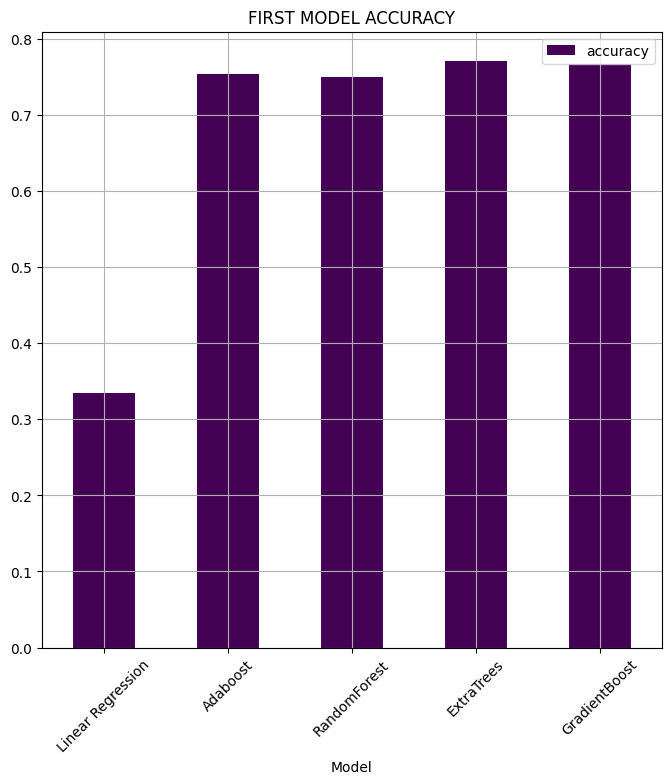

In [93]:
#r1 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FIRST MODEL ACCURACY', colormap=plt.cm.viridis, sort_columns=True)
#r1.set_xticklabels(result_df.Model, rotation = 45)

r1 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FIRST MODEL ACCURACY', colormap=plt.cm.viridis)
r1.set_xticklabels(result_df.Model, rotation=45)
plt.show()

second models

In [94]:
second_model = {'Model': ['Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [ab2_score, rf2_score, et2_score, gb2_score]}

result_df = pd.DataFrame(data = second_model)
result_df

,Model,accuracy
0,Adaboost,0.7364
1,RandomForest,0.7493
2,ExtraTrees,0.7591
3,GradientBoost,0.7507


[Text(0, 0, 'Adaboost'),
 Text(1, 0, 'RandomForest'),
 Text(2, 0, 'ExtraTrees'),
 Text(3, 0, 'GradientBoost')]

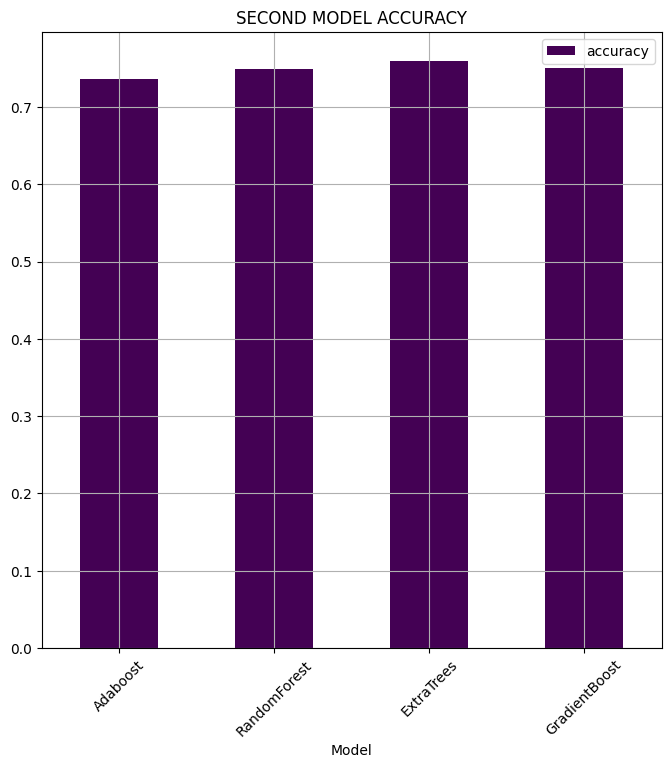

In [96]:
r2 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='SECOND MODEL ACCURACY', colormap=plt.cm.viridis,)
r2.set_xticklabels(result_df.Model, rotation = 45)

final models

In [97]:
final_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost', 'MLP'],
               'accuracy' : [lr_finalscore, ab_finalscore, rf_finalscore, et_finalscore, gb_finalscore, mlp_finalscore]}

result_df = pd.DataFrame(data = final_model)
result_df

,Model,accuracy
0,Linear Regression,0.277581
1,Adaboost,0.754000
2,RandomForest,0.749900
3,ExtraTrees,0.762600
4,GradientBoost,0.764100
5,MLP,0.722500


[Text(0, 0, 'Linear Regression'),
 Text(1, 0, 'Adaboost'),
 Text(2, 0, 'RandomForest'),
 Text(3, 0, 'ExtraTrees'),
 Text(4, 0, 'GradientBoost'),
 Text(5, 0, 'MLP')]

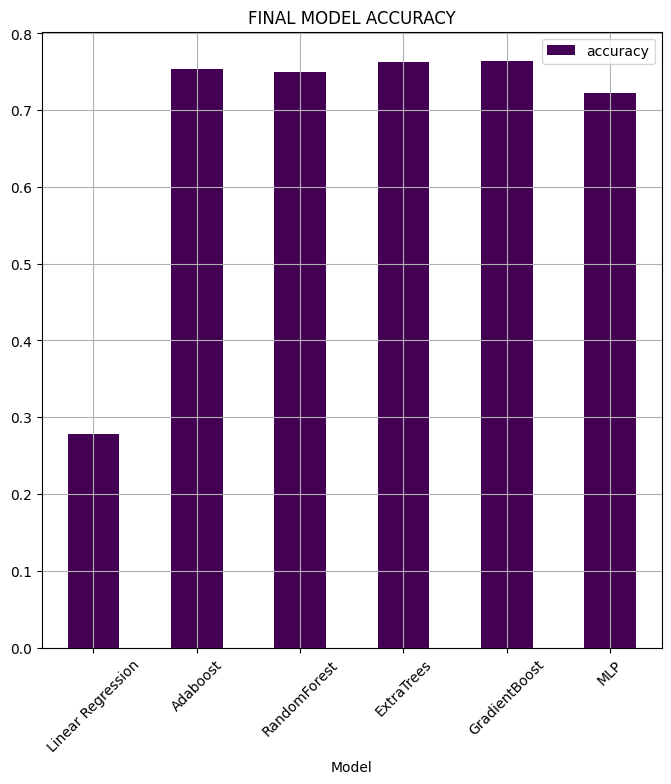

In [98]:
r3 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FINAL MODEL ACCURACY', colormap=plt.cm.viridis,)
r3.set_xticklabels(result_df.Model, rotation = 45)

FASTEST AND ACCURATE MODEL - ExtraTrees of the final model (76.26%)
STRONGEST AND THE MOST ACCURATE MODEL - GradientBoost of the final model (76.4%)¶
Gradient boost has a 76.4 percent chance, but the speed is significantly faster with ExtraTress.